In [165]:
#Import Libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import glob
import os

In [166]:
# Specify the path where your CSV files are located
csv_files = glob.glob('Data/Cars/*.csv')

# Initialize an empty list to store individual DataFrames
dfs = []

# Iterate through each CSV file and read it into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    file = file[10:-4]
    df['Brand'] = file 
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)


In [167]:
#Create a copy of df to use
df = combined_df.copy()
df = df.drop('tax(£)', axis=1)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104641 entries, 0 to 104640
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         104641 non-null  object 
 1   year          104641 non-null  int64  
 2   price         104641 non-null  int64  
 3   transmission  104641 non-null  object 
 4   mileage       104641 non-null  int64  
 5   fuelType      104641 non-null  object 
 6   tax           94327 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    104641 non-null  float64
 9   Brand         104641 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 8.0+ MB


In [169]:
#Checking for duplicatesd row - very low probabilities to have the same combinations of features, most likely a typo
df.duplicated().sum()

2179

In [170]:
#Dropping duplicates
df.drop_duplicates(inplace=True)

In [171]:
#Check for duplicates
df.duplicated().sum()

0

In [172]:
#Converting Year string datatype to date
df['year']= df['year'].astype(str)
df['year'] = pd.to_datetime(df['year']+'-01-01')

In [173]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brand
0,A1,2017-01-01,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016-01-01,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016-01-01,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017-01-01,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019-01-01,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [174]:
num_rows, num_columns = df.shape
print("This dataset has ", num_rows, " rows and ", num_columns, " columns")

This dataset has  102462  rows and  10  columns


In [175]:
#Check nulls
df.isna().sum()

model              0
year               0
price              0
transmission       0
mileage            0
fuelType           0
tax             9524
mpg             4758
engineSize         0
Brand              0
dtype: int64

In [176]:
#Handling missing values
df['tax']=df['tax'].fillna(df['tax'].mean())
df['mpg']=df['mpg'].fillna(df['mpg'].mean())

In [177]:
#Check nulls
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Brand           0
dtype: int64

In [178]:
#Initial diagnosis
df.describe().T.round(2)

,count,mean,min,25%,50%,75%,max,std
year,102462,2017-01-23 12:00:00.000000256,1970-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00,2019-01-01 00:00:00,2060-01-01 00:00:00,NaN
price,102462.0,16610.115457,450.0,9999.0,14298.0,20300.0,159999.0,9717.264619
mileage,102462.0,23250.267533,1.0,7800.0,17642.5,32457.0,323000.0,21065.370142
tax,102462.0,120.088715,0.0,120.088715,145.0,145.0,580.0,60.58511
mpg,102462.0,55.205783,0.3,47.1,55.205783,62.8,470.8,15.801861
engineSize,102462.0,1.651141,0.0,1.2,1.5,2.0,6.6,0.55569


In [179]:
cat_features = [column for column in df.columns if (df[column].dtypes == 'object') ]
print("Categorical Features: ")
cat_features

Categorical Features: 


['model', 'transmission', 'fuelType', 'Brand']

In [180]:
numeric_features = [column for column in df.columns if (df[column].dtypes != 'object') ]
print("Numeric Features: ")
numeric_features

Numeric Features: 


['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

In [181]:
#What brands do we have?
df['Brand'].unique()

df.loc[]

array(['audi', 'bmw', 'focus', 'ford', 'hyundi', 'merc', 'skoda',
       'toyota', 'vauxhall', 'vw'], dtype=object)

In [182]:
# focus is a model of ford.. we should include it
df.loc[
    df['Brand']=='focus','Brand'
] = 'ford'

df['Brand'].unique()

array(['audi', 'bmw', 'ford', 'hyundi', 'merc', 'skoda', 'toyota',
       'vauxhall', 'vw'], dtype=object)

In [183]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brand
0,A1,2017-01-01,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016-01-01,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016-01-01,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017-01-01,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019-01-01,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


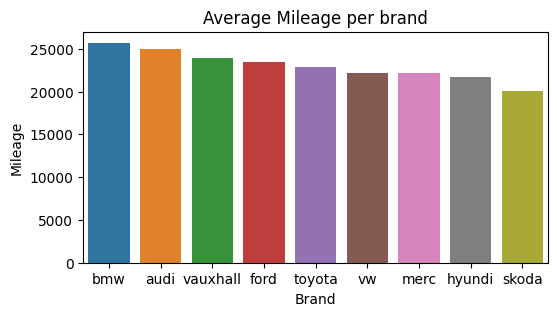

In [184]:
# Average mileage for a car for each brand
df_by_mileagedf=df.groupby(['Brand'])['mileage'].mean().sort_values(ascending=False).round().reset_index(name='Mileage')

plt.figure(figsize=(6,3))
plt.title("Average Mileage per brand")
sns.barplot(x='Brand', y ='Mileage', data=df_by_mileagedf, errorbar='sd')
plt.show()

- BMW, AUDI and VAUXHALL has the highest used car has the highest Mileage

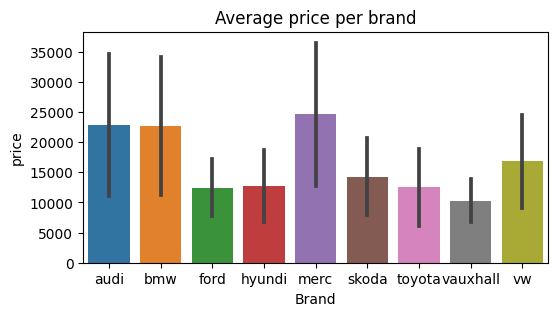

In [185]:
# Average price for a car for each brand
df_by_price = df.groupby(['Brand'])['price'].mean().sort_values(ascending=False).round().reset_index(name='price').sort_values(by='price', ascending=True)
df_by_price
plt.figure(figsize=(6,3))
plt.title("Average price per brand")
sns.barplot(x='Brand',y='price', data=df, errorbar="sd")
plt.show()

-   MERC, AUDI AND BMW SHOWS THE HIGHEST STDv... lets take a look if thats true

In [186]:
for brand in df['Brand'].unique():
    brand_std = df.loc[
        df['Brand'] == brand
    ]['price'].std()
    brand_mean = df.loc[
        df['Brand'] == brand
    ]['price'].mean()
    brand_median = df.loc[
        df['Brand'] == brand
    ]['price'].median()
    print('The stdv for: ', brand , " is:  ", brand_std.round(), " with a mean of: ", brand_mean.round(), " and a Coeficient of variation of: ", (brand_std/brand_mean).round(3),
    "and a median of: ", brand_median.round() )

The stdv for:  audi  is:   11723.0  with a mean of:  22854.0  and a Coeficient of variation of:  0.513 and a median of:  20000.0
The stdv for:  bmw  is:   11435.0  with a mean of:  22693.0  and a Coeficient of variation of:  0.504 and a median of:  20262.0
The stdv for:  ford  is:   4737.0  with a mean of:  12477.0  and a Coeficient of variation of:  0.38 and a median of:  11598.0
The stdv for:  hyundi  is:   5973.0  with a mean of:  12724.0  and a Coeficient of variation of:  0.469 and a median of:  11992.0
The stdv for:  merc  is:   11874.0  with a mean of:  24636.0  and a Coeficient of variation of:  0.482 and a median of:  22299.0
The stdv for:  skoda  is:   6340.0  with a mean of:  14285.0  and a Coeficient of variation of:  0.444 and a median of:  12998.0
The stdv for:  toyota  is:   6359.0  with a mean of:  12530.0  and a Coeficient of variation of:  0.507 and a median of:  10798.0
The stdv for:  vauxhall  is:   3530.0  with a mean of:  10314.0  and a Coeficient of variation of:

-   Indeed! Merc, Audi and bmw have the highest stdv among the brands! even though they have the highest stdv, the CV is pretty close between them!

<Figure size 600x300 with 0 Axes>

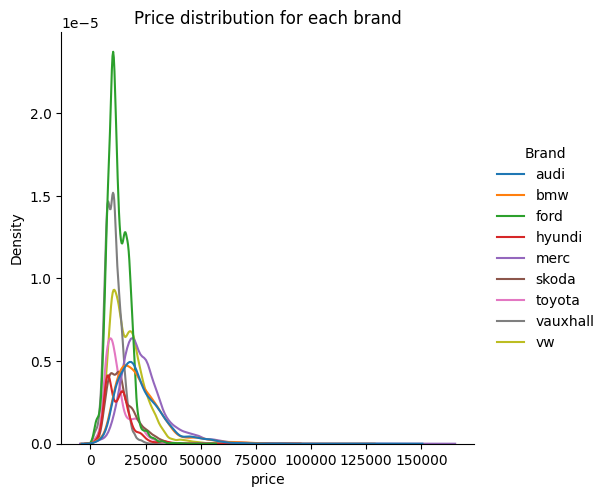

In [187]:
plt.figure(figsize=(6,3))
sns.displot(data=df, x='price', hue='Brand', kind ='kde')
plt.title("Price distribution for each brand")
plt.show()

-   looks too cluttered... lets split them one by one.

-   Overall distribution is right skewed, therefore the mean will be higher than the median as we expected from our last point.

In [188]:
df.loc[
        df['Brand'] == brand 
    ]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brand
89484,T-Roc,2019-01-01,25000,Automatic,13904,Diesel,145.0,49.6,2.0,vw
89485,T-Roc,2019-01-01,26883,Automatic,4562,Diesel,145.0,49.6,2.0,vw
89486,T-Roc,2019-01-01,20000,Manual,7414,Diesel,145.0,50.4,2.0,vw
89487,T-Roc,2019-01-01,33492,Automatic,4825,Petrol,145.0,32.5,2.0,vw
89488,T-Roc,2019-01-01,22900,Semi-Auto,6500,Petrol,150.0,39.8,1.5,vw
...,...,...,...,...,...,...,...,...,...,...
104636,Eos,2012-01-01,5990,Manual,74000,Diesel,125.0,58.9,2.0,vw
104637,Fox,2008-01-01,1799,Manual,88102,Petrol,145.0,46.3,1.2,vw
104638,Fox,2009-01-01,1590,Manual,70000,Petrol,200.0,42.0,1.4,vw
104639,Fox,2006-01-01,1250,Manual,82704,Petrol,150.0,46.3,1.2,vw


In [189]:
# Lets take a look... how many uniques models we have in each brand
for brand in df['Brand'].unique():
    uniques_models = df.loc[
        df['Brand'] == brand 
    ]['model'].unique()
    print("Brand: ", brand, "Has: ", len(uniques_models), " unique models")

Brand:  audi Has:  26  unique models
Brand:  bmw Has:  24  unique models
Brand:  ford Has:  23  unique models
Brand:  hyundi Has:  16  unique models
Brand:  merc Has:  27  unique models
Brand:  skoda Has:  12  unique models
Brand:  toyota Has:  18  unique models
Brand:  vauxhall Has:  22  unique models
Brand:  vw Has:  27  unique models


In [190]:
# lets dive into toyota, since is one of my favorite brands
df_toyota = df.loc[
    df['Brand']=='toyota'
]

In [194]:
df_toyota.describe().T.round()

,count,mean,min,25%,50%,75%,max,std
year,6699,2016-09-28 17:36:05.158978816,1998-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00,2018-01-01 00:00:00,2020-01-01 00:00:00,NaN
price,6699.0,12529.799074,850.0,8266.5,10798.0,14995.0,59995.0,6358.562625
mileage,6699.0,22889.588745,2.0,9488.5,18571.0,31059.5,174419.0,19109.288501
tax,6699.0,94.549933,0.0,0.0,135.0,145.0,565.0,73.942649
mpg,6699.0,63.078728,2.8,55.4,62.8,70.6,235.0,15.861037
engineSize,6699.0,1.471996,0.0,1.0,1.5,1.8,4.5,0.435624


In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numerical_features(df):
    numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

    for feature in numerical_features:
        plt.figure(figsize=(12, 6))
        
        # Create displot
        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=feature, kde=True, hue = 'fuelType')
        plt.title(f'Distribution of {feature}')
        
        # Create boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, y=feature)
        plt.title(f'Boxplot of {feature}')
        
        plt.tight_layout()
        plt.show()

-----------------------TOYOTA-----------------------


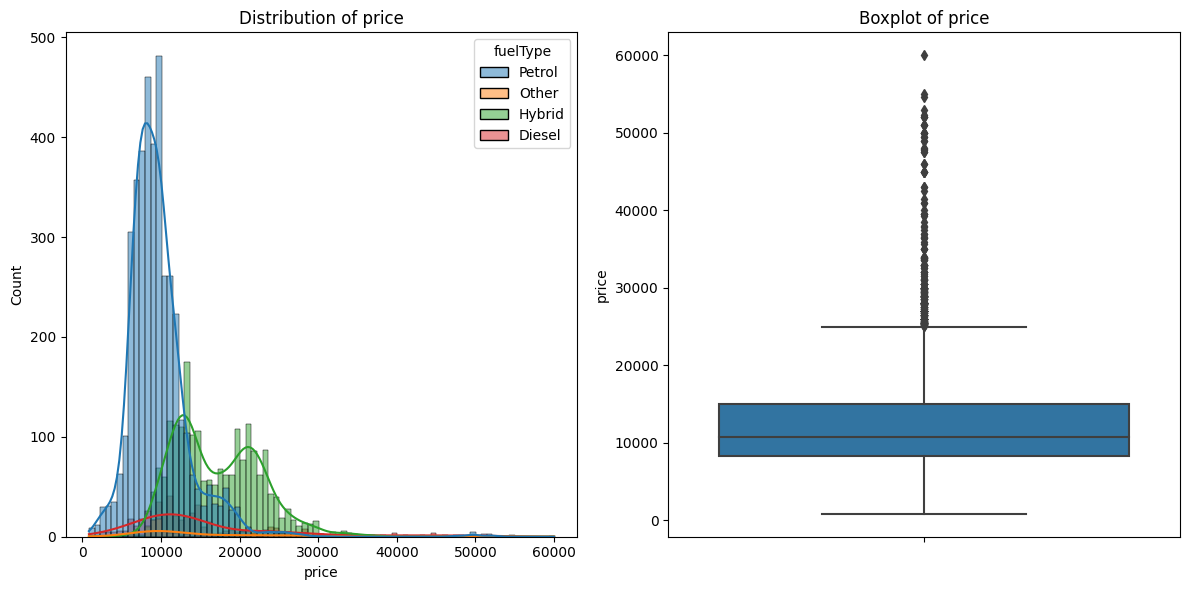

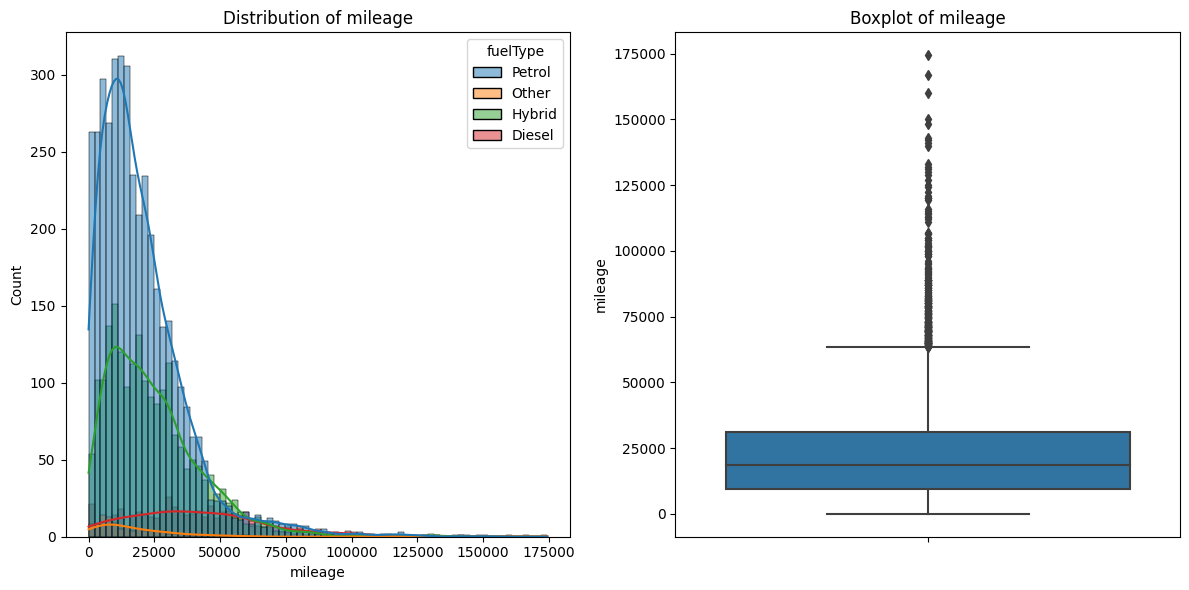

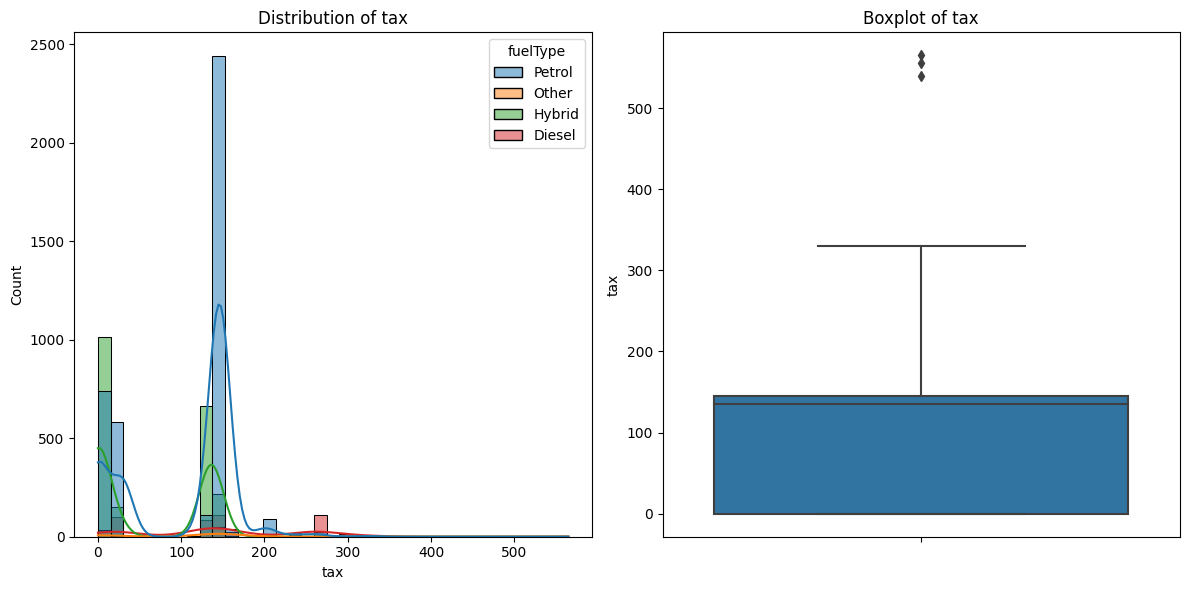

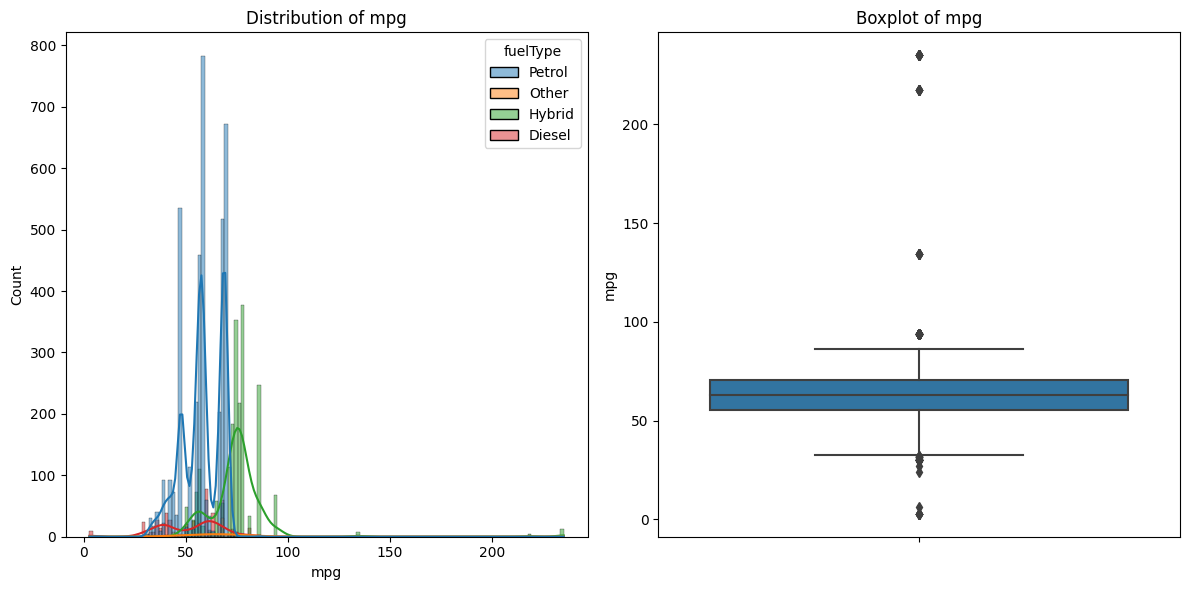

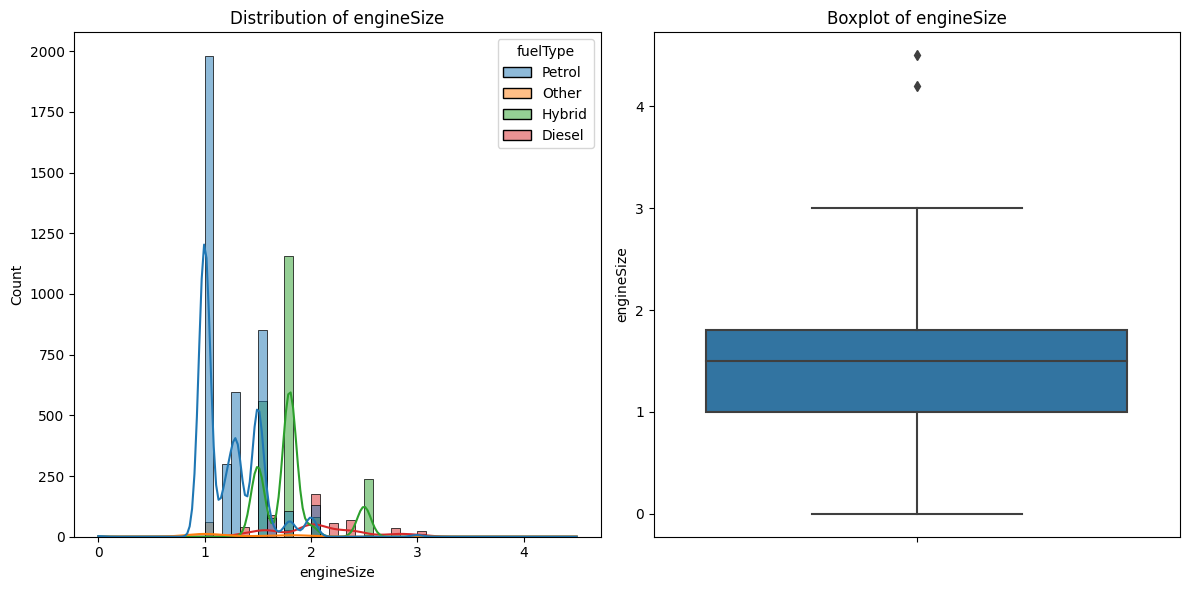

In [230]:
print('-----------------------TOYOTA-----------------------')
plot_numerical_features(df_toyota)


- Petrol fueltype care are cheaper than hybrid (we can also observe a bi modal ditribution in Hybrid fueltype)
- Hybrid fueltype also has the best mpg

In [222]:

def plot_categorical_features(df):
    categorical_features = df.select_dtypes(include=['object', 'category']).columns

    for feature in categorical_features:
        if(feature != 'Brand'):
            plt.figure(figsize=(12, 6))
            
            # Create bar plot
            plt.subplot(1, 2, 1)
            sns.countplot(data=df, x=feature)
            plt.title(f'Bar Plot of {feature}')
            plt.xticks(rotation=90)
            
            # Create pie chart
            plt.subplot(1, 2, 2)
            counts = df[feature].value_counts()
            plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
            plt.title(f'Pie Chart of {feature}')
            
            plt.tight_layout()
            plt.show()


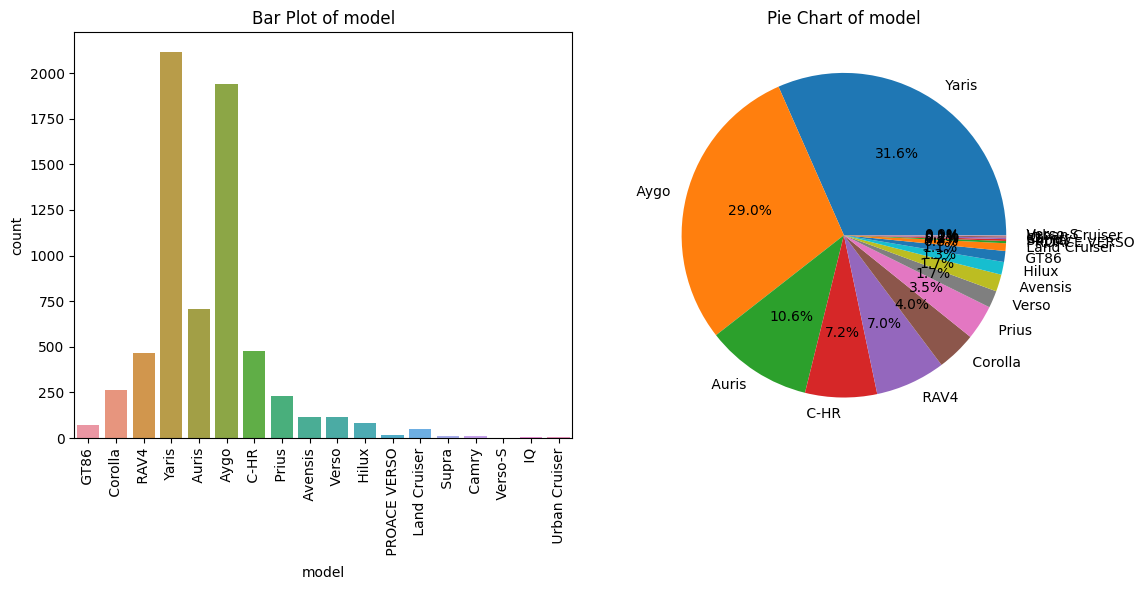

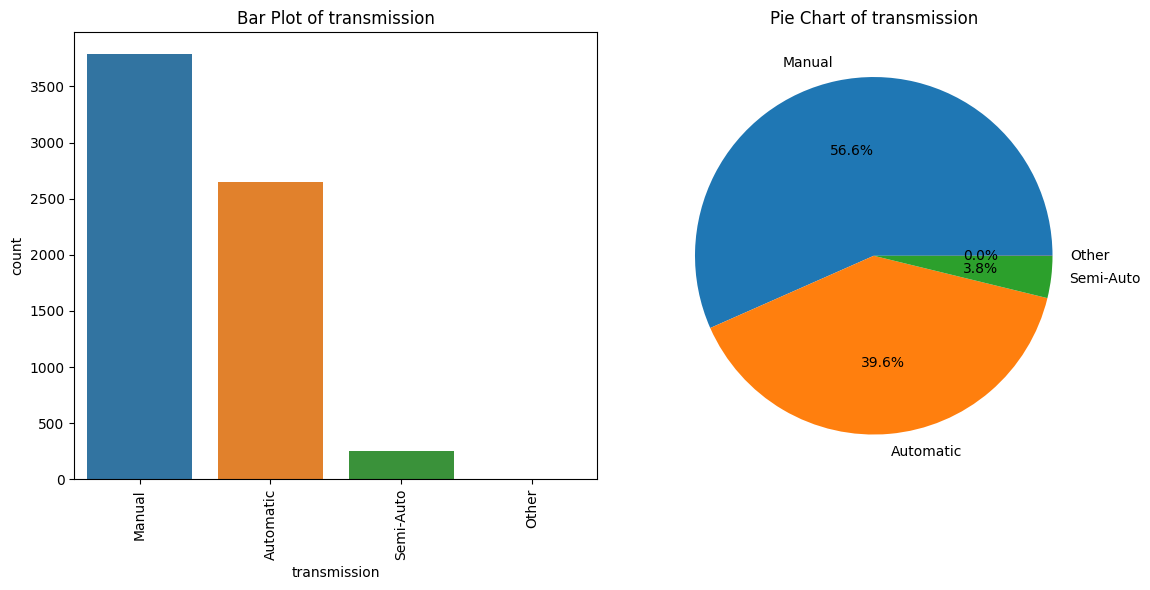

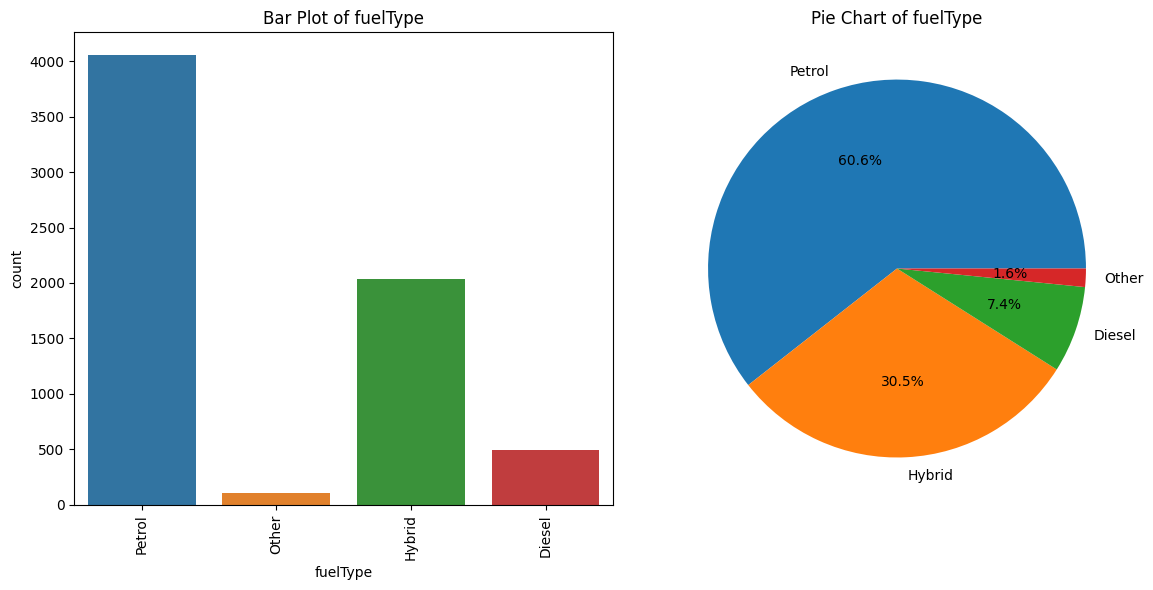

In [223]:
# Assuming you have a DataFrame called 'df'
plot_categorical_features(df_toyota)


- Yaris, Aygo and Auris conformed almost 70% of all brands.
- more than half are still cars with manual transmision (around 60%) 
- Petrol is the most popular fueltype followerd by Hybrid.

In [215]:

def plot_correlation_heatmap(df):
    numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
    
    corr_matrix = df[numerical_features].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()


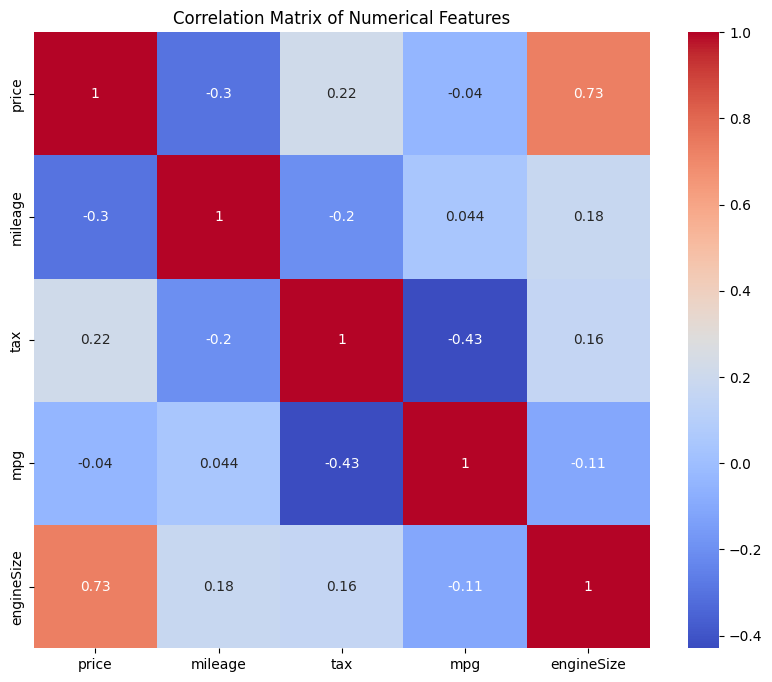

In [216]:
plot_correlation_heatmap(df_toyota)

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_correlation(df, feature):
    numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
    
    correlations = df[numerical_features].corr()[feature]
    correlations = correlations.drop(feature)  # Exclude self-correlation
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x=correlations.index, y=correlations.values)
    plt.title(f'Correlation with {feature}')
    plt.xlabel('Features')
    plt.ylabel('Correlation')
    plt.xticks(rotation=90)
    plt.show()


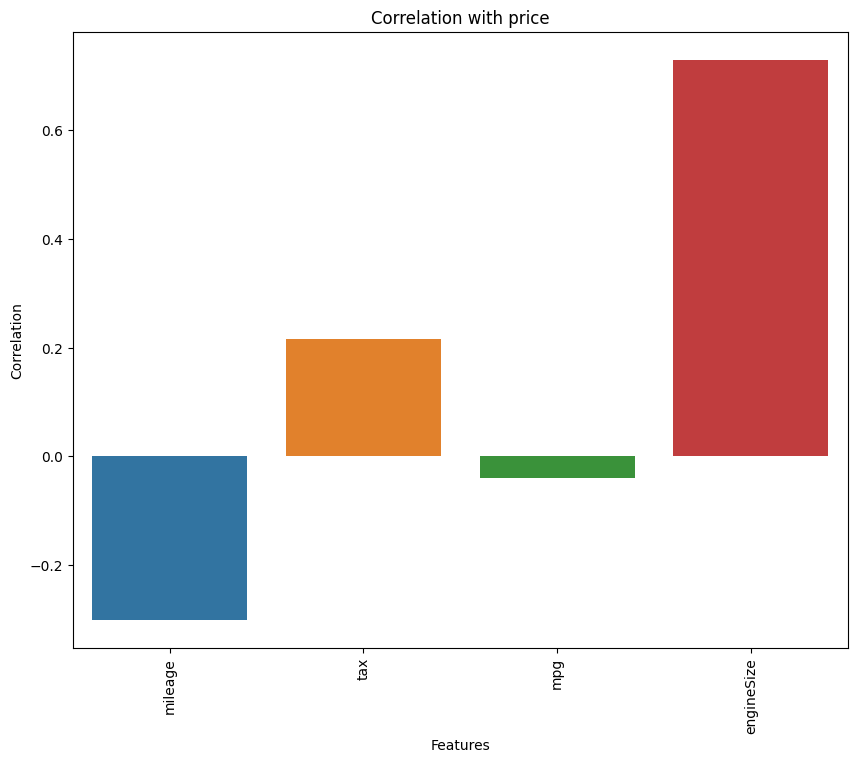

In [218]:
# Assuming you have a DataFrame called 'df' and want to check the correlation with 'target_feature'
plot_feature_correlation(df_toyota, 'price')


-   For Toyota, enginesize has the stronger correlation with the price and as expected an inverse correlation with mileage